# INIT

In [1]:
%cd ..

E:\Coding\Python\PlasmaChemistry


In [2]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from plasmistry.electron import EEDF
from plasmistry.electron import get_maxwell_eedf
from plasmistry.molecule import get_ideal_gas_density

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["font.size"] = 17

In [4]:
np.set_printoptions(precision=1, linewidth=130, edgeitems=5)
pd.options.display.float_format = '{:,.1e}'.format

# Read inelas reactions

In [5]:
inelas_df = pd.read_pickle("_output/cros_reactions.pkl")

# Choose the reactions considered.

In [6]:
inelas_df

,formula,type,threshold_eV,cross_section
0,E + H2 => E + H2(v1),EXCITATION,5.2e-01,"[[0.0001, 0.00010016132706854269, 0.0001003229..."
1,E + H2 => E + H2(v2),EXCITATION,1.0e+00,"[[0.4856084787426168, 0.48560864006968535, 0.4..."
2,E + H2 => E + H2(v3),EXCITATION,1.5e+00,"[[0.9410309521450216, 0.9410311134720902, 0.94..."
3,E + H2(v1) => E + H2(v2),EXCITATION,4.9e-01,"[[4.044021386589297e-05, 8.904232533439929e-05..."
4,E + H2(v1) => E + H2(v3),EXCITATION,9.4e-01,"[[0.4254364680621926, 0.42543662938926113, 0.4..."
5,E + H2(v1) => E + H2(v4),EXCITATION,1.4e+00,"[[0.8507729361243853, 0.8507730974514539, 0.85..."
6,E + H2(v2) => E + H2(v3),EXCITATION,4.6e-01,"[[8.089532068401156e-05, 0.0001780995676473815..."
7,E + H2(v2) => E + H2(v4),EXCITATION,8.8e-01,"[[0.3652644573817684, 0.3652646187088369, 0.36..."
8,E + H2(v2) => E + H2(v5),EXCITATION,1.3e+00,"[[0.7605149201037485, 0.7605150814308171, 0.76..."
9,E + H2(v3) => E + H2(v4),EXCITATION,4.3e-01,"[[4.360979794812425e-05, 0.0001892907637275481..."


In [7]:
species = pd.read_pickle("_output/species.pkl")

In [8]:
species

0            E
1           H2
2       H2(v1)
3       H2(v2)
4       H2(v3)
5       H2(v4)
6       H2(v5)
7       H2(v6)
8       H2(v7)
9       H2(v8)
10      H2(v9)
11     H2(v10)
12     H2(v11)
13     H2(v12)
14     H2(v13)
15     H2(v14)
16     CO2(va)
17     CO2(vb)
18     CO2(vc)
19     CO2(vd)
20         CO2
21     CO2(v1)
22     CO2(v2)
23     CO2(v3)
24     CO2(v4)
25     CO2(v5)
26     CO2(v6)
27     CO2(v7)
28     CO2(v8)
29     CO2(v9)
        ...   
34    CO2(v14)
35    CO2(v15)
36    CO2(v16)
37    CO2(v17)
38    CO2(v18)
39    CO2(v19)
40    CO2(v20)
41    CO2(v21)
42          CO
43      CO(v1)
44      CO(v2)
45      CO(v3)
46      CO(v4)
47      CO(v5)
48      CO(v6)
49      CO(v7)
50      CO(v8)
51      CO(v9)
52     CO(v10)
53          O2
54         H2O
55     H2(all)
56    CO2(all)
57     CO(all)
58    H2O(all)
59     O2(all)
60           H
61           O
62           C
63          OH
Length: 64, dtype: object

In [9]:
inelas_df['threshold_eV'] = inelas_df['threshold_eV'].astype(float)

In [10]:
eedf = EEDF(max_energy_eV=50, grid_number=500)

In [11]:
eedf.initialize(rctn_with_crostn_df=inelas_df, total_species=species.tolist())

## properties

In [12]:
eedf.bg_molecule_elas

['H2', 'CO2', 'CO', 'O2', 'H2O']

In [13]:
eedf.n_bg_molecule_inelas

52

In [14]:
eedf.bg_molecule_inelas

array(['CO', 'CO(v1)', 'CO(v10)', 'CO(v2)', 'CO(v3)', 'CO(v4)', 'CO(v5)', 'CO(v6)', 'CO(v7)', 'CO(v8)', 'CO(v9)', 'CO2',
       'CO2(v1)', 'CO2(v10)', 'CO2(v11)', 'CO2(v12)', 'CO2(v13)', 'CO2(v14)', 'CO2(v15)', 'CO2(v16)', 'CO2(v17)', 'CO2(v18)',
       'CO2(v19)', 'CO2(v2)', 'CO2(v20)', 'CO2(v21)', 'CO2(v3)', 'CO2(v4)', 'CO2(v5)', 'CO2(v6)', 'CO2(v7)', 'CO2(v8)',
       'CO2(v9)', 'CO2(va)', 'CO2(vb)', 'CO2(vc)', 'CO2(vd)', 'H2', 'H2(v1)', 'H2(v10)', 'H2(v11)', 'H2(v12)', 'H2(v13)',
       'H2(v14)', 'H2(v2)', 'H2(v3)', 'H2(v4)', 'H2(v5)', 'H2(v6)', 'H2(v7)', 'H2(v8)', 'H2(v9)'], dtype=object)

In [15]:
eedf.n_inelas_rctn

489

In [16]:
N = get_ideal_gas_density(p_Pa=1e5, Tgas_K=3000)
N

2.4143243625601112e+24

# Set parameters

In [17]:
eedf.set_parameters(E=151e3, Tgas=3000, N=N)

In [54]:
total_species_density = np.zeros(len(species))
# for i in range(1, 16):
#     total_species_density[i] = N * 0.5 / 15
# for i in range(16, 42):
#     total_species_density[i] = N * 0.5 / 26
total_species_density[1] = N * 1.0    # H2
total_species_density[20] = N * 0.0   # CO2
    
def dndt_all(t, y):
    eedf.set_density_per_J(y)
    eedf.set_flux(total_species_density=total_species_density)
    return eedf.get_deriv_total(total_species_density=total_species_density) 

In [55]:
total_species_density

array([0.0e+00, 2.4e+24, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
       0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00])

In [56]:
y0 = get_maxwell_eedf(eedf.energy_point, Te_eV=0.7)*1e20
time_span = [0, 1e-1]
sol = solve_ivp(dndt_all, time_span, y0, method="BDF")

In [57]:
len(sol.t)

169

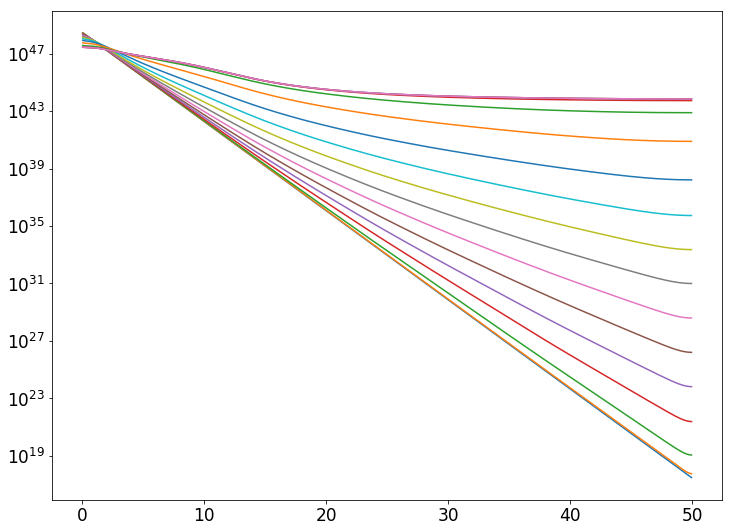

In [58]:
plt.semilogy(eedf.energy_point_eV, (sol.y.transpose()/np.sqrt(eedf.energy_point)).transpose()[:,::10])

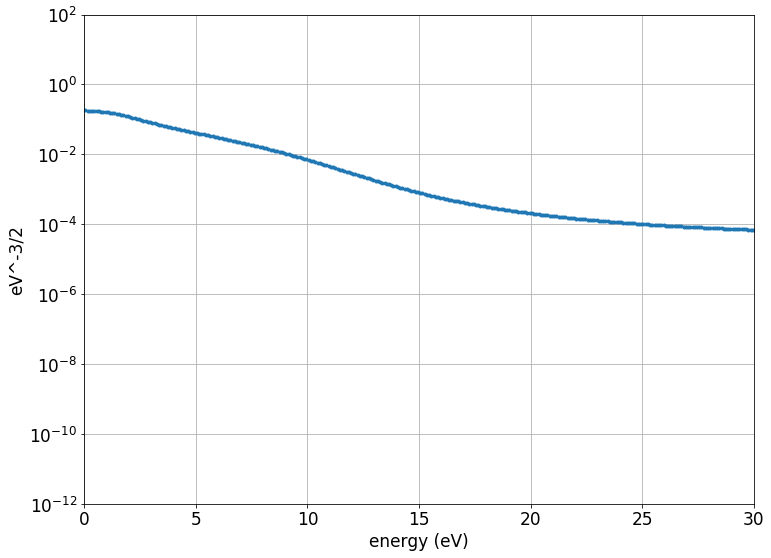

In [59]:
eedf.set_density_per_J(sol.y[:,-1])
eedf.plot_normalized_eepf(xlim=(0,30), ylim=(1e-12, 1e2))


In [60]:
np.savetxt('output.dat', np.vstack((eedf.energy_point_eV, eedf.normalized_eepf_eV)).transpose())

In [61]:
print(eedf)


        
        
               ENERGY SPACE (eV) : (0.0, 50.0)
        
     NUMBER OF DISCRETIZED CELLS : 500 cells
        
            ENERGY INTERVAL (eV) : 0.100 
        
        
            ELECTRON TEMPERATURE : 3.0250 eV
        
            ELECTRON MEAN ENERGY : 4.5375 eV
        
                ELECTRON DENSITY : 1.00e+20 m^-3
        
        
              ELECTRIC FIELD (E) : 151000 V/m (1.51 kV/cm) 
        
          GAS TEMPERATURE (Tgas) : 3000 K
        
 BACKGROUND MOLECULE DENSITY (N) : 2.4e+24 m^-3
        
    REDUCED ELECTRIC FIELD (E/N) : 62.5 Td
        
        
     ELASTIC COLLISION MOLECULES : ['H2', 'CO2', 'CO', 'O2', 'H2O']
        
   INELASTIC COLLISION MOLECULES : ['CO' 'CO(v1)' 'CO(v10)' 'CO(v2)' 'CO(v3)' 'CO(v4)' 'CO(v5)' 'CO(v6)' 'CO(v7)' 'CO(v8)' 'CO(v9)' 'CO2' 'CO2(v1)' 'CO2(v10)'
 'CO2(v11)' 'CO2(v12)' 'CO2(v13)' 'CO2(v14)' 'CO2(v15)' 'CO2(v16)' 'CO2(v17)' 'CO2(v18)' 'CO2(v19)' 'CO2(v2)' 'CO2(v20)'
 'CO2(v21)' 'CO2(v3)' 'CO2(v4)' 'CO2(v5)'

In [26]:
eedf._get_molecule_rate_const_e_inelas()

array([2.8e-15, 1.4e-16, 1.6e-17, 4.6e-15, 2.3e-16, 2.7e-17, 6.7e-15, 3.5e-16, 4.0e-17, 9.7e-15, 5.0e-16, 5.8e-17, 1.4e-14,
       7.2e-16, 8.5e-17, 2.0e-14, 1.0e-15, 1.2e-16, 2.8e-14, 1.5e-15, 1.8e-16, 3.9e-14, 2.1e-15, 2.5e-16, 5.3e-14, 2.9e-15,
       3.5e-16, 7.2e-14, 3.9e-15, 4.8e-16, 9.4e-14, 5.1e-15, 6.4e-16, 1.2e-13, 6.7e-15, 8.4e-16, 1.5e-13, 8.5e-15, 1.9e-13,
       3.7e-15, 2.4e-16, 6.0e-15, 3.5e-17, 3.9e-16, 8.6e-15, 5.7e-17, 5.6e-16, 1.2e-14, 8.0e-17, 7.8e-16, 1.7e-14, 1.1e-16,
       1.1e-15, 2.4e-14, 1.5e-16, 1.5e-15, 3.4e-14, 2.1e-16, 2.1e-15, 4.6e-14, 2.9e-16, 2.9e-15, 6.2e-14, 4.0e-16, 3.8e-15,
       8.2e-14, 5.2e-16, 5.0e-15, 1.1e-13, 6.8e-16, 6.4e-15, 1.3e-13, 8.6e-16, 8.0e-15, 1.7e-13, 1.1e-15, 1.0e-14, 2.1e-13,
       2.1e-16, 3.2e-16, 4.6e-16, 6.3e-16, 8.3e-16, 1.0e-15, 1.3e-15, 1.5e-15, 1.8e-15, 2.1e-15, 2.3e-15, 2.6e-15, 2.8e-15,
       3.0e-15, 5.6e-15, 3.4e-15, 2.1e-15, 5.6e-15, 3.4e-15, 2.1e-15, 5.6e-15, 3.4e-15, 2.1e-15, 5.6e-15, 3.4e-15, 2.1e-15,
       5

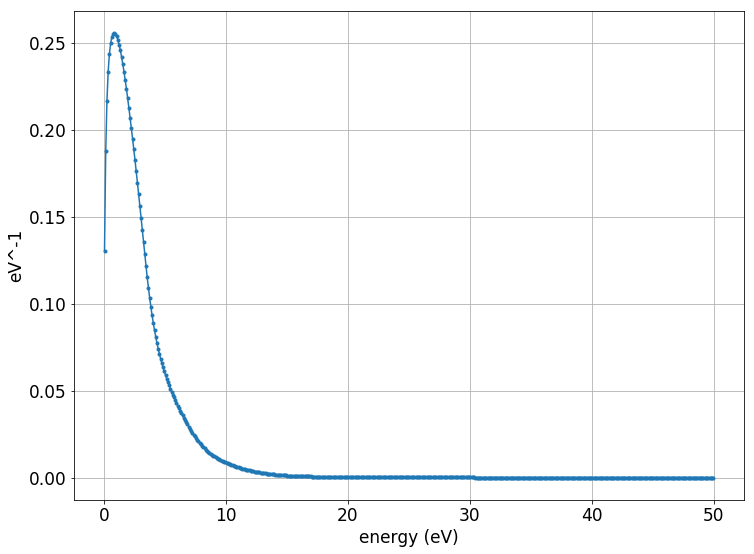

In [27]:
eedf.plot_normalized_eedf()

Text(0.5, 1.0, 'Te vs. t')

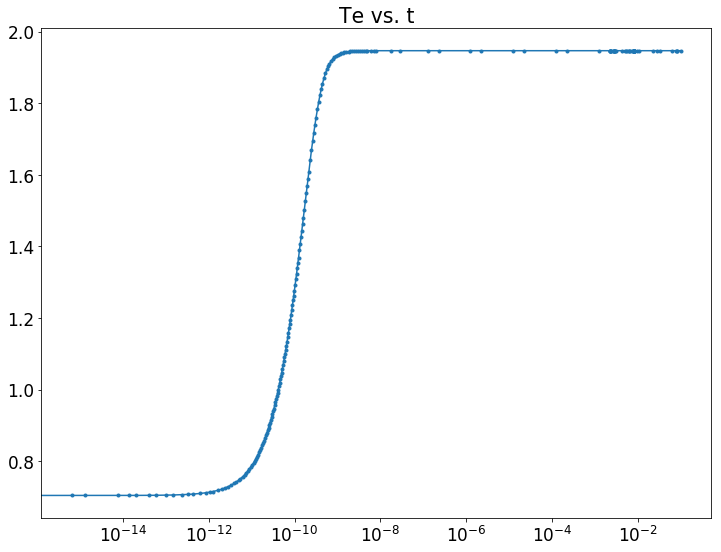

In [28]:
Te_seq = []
ne_seq = []
for _array in sol.y.transpose():
    eedf.set_density_per_J(_array)
    Te_seq.append(eedf.electron_temperature_in_eV)
    ne_seq.append(eedf.electron_density)
plt.semilogx(sol.t, Te_seq, marker='.')
plt.title("Te vs. t")

In [29]:
sol.y

array([[2.5e+38, 2.5e+38, 2.5e+38, 2.5e+38, 2.5e+38, ..., 8.1e+37, 8.1e+37, 8.1e+37, 8.1e+37, 8.1e+37],
       [3.8e+38, 3.8e+38, 3.8e+38, 3.8e+38, 3.8e+38, ..., 1.2e+38, 1.2e+38, 1.2e+38, 1.2e+38, 1.2e+38],
       [4.2e+38, 4.2e+38, 4.2e+38, 4.2e+38, 4.2e+38, ..., 1.4e+38, 1.4e+38, 1.4e+38, 1.4e+38, 1.4e+38],
       [4.3e+38, 4.3e+38, 4.3e+38, 4.3e+38, 4.3e+38, ..., 1.5e+38, 1.5e+38, 1.5e+38, 1.5e+38, 1.5e+38],
       [4.2e+38, 4.2e+38, 4.2e+38, 4.2e+38, 4.2e+38, ..., 1.5e+38, 1.5e+38, 1.5e+38, 1.5e+38, 1.5e+38],
       ...,
       [1.5e+09, 1.5e+09, 1.5e+09, 1.5e+09, 1.6e+09, ..., 1.7e+34, 1.7e+34, 1.7e+34, 1.7e+34, 1.7e+34],
       [1.3e+09, 1.3e+09, 1.3e+09, 1.3e+09, 1.4e+09, ..., 1.7e+34, 1.7e+34, 1.7e+34, 1.7e+34, 1.7e+34],
       [1.2e+09, 1.2e+09, 1.2e+09, 1.2e+09, 1.2e+09, ..., 1.7e+34, 1.7e+34, 1.7e+34, 1.7e+34, 1.7e+34],
       [1.0e+09, 1.0e+09, 1.0e+09, 1.0e+09, 1.0e+09, ..., 1.7e+34, 1.7e+34, 1.7e+34, 1.7e+34, 1.7e+34],
       [8.7e+08, 8.7e+08, 8.8e+08, 9.2e+08, 9.5e+08,

In [30]:
eedf.set_density_per_J(sol.y[:,-1])
eedf.set_flux(total_species_density=total_species_density)

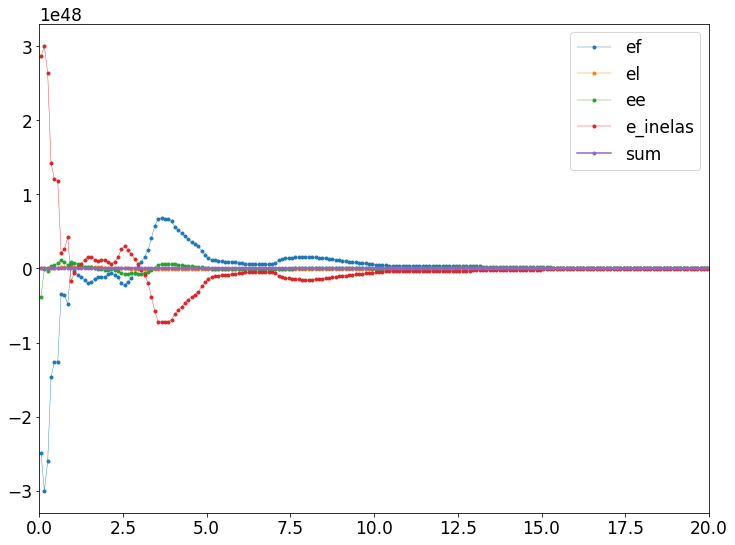

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(eedf.energy_point_eV, eedf._get_deriv_ef(), 
        linewidth=0.4, marker='.', label='ef')
ax.plot(eedf.energy_point_eV, eedf._get_deriv_el(), 
        linewidth=0.4, marker='.', label='el')
ax.plot(eedf.energy_point_eV, eedf._get_deriv_ee(), 
        linewidth=0.4, marker='.', label='ee')
ax.plot(eedf.energy_point_eV, eedf._get_electron_rate_e_inelas(density=total_species_density), 
        linewidth=0.4, marker='.', label='e_inelas')
ax.plot(eedf.energy_point_eV, eedf.get_deriv_total(total_species_density=total_species_density), 
        linewidth=1.5, marker='.', label='sum')
# ax.plot(eedf.energy_nodes,eedf.J_flux_el, marker='.', label='el')
# ax.plot(eedf.energy_nodes,eedf.J_flux_ee, marker='.', label='ee')
# ax.plot(eedf.energy_nodes,eedf.J_flux_ef+eedf.J_flux_el+eedf.J_flux_ee, marker='.', label='ef+el+ee')
# ax.set_yscale('symlog')
# ax.set_xscale('log')
ax.set_xlim((0,20))
ax.legend()

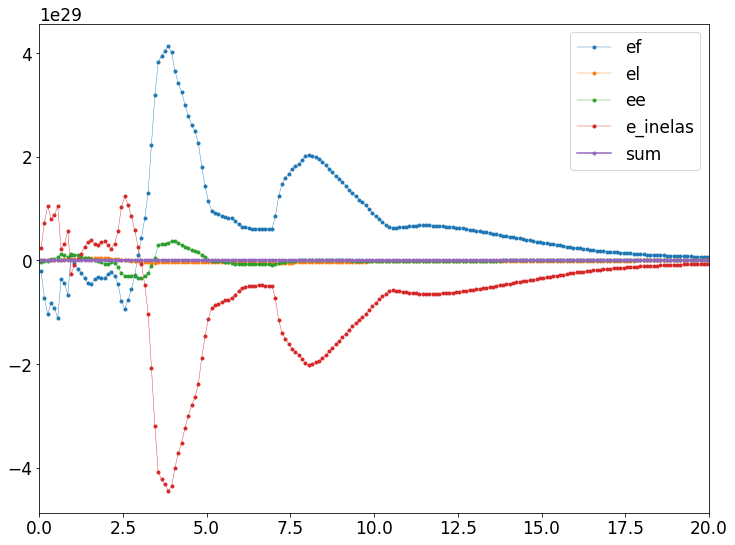

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(eedf.energy_point_eV, eedf._get_deriv_ef()*eedf.energy_point, 
        linewidth=0.4, marker='.', label='ef')
ax.plot(eedf.energy_point_eV, eedf._get_deriv_el()*eedf.energy_point, 
        linewidth=0.4, marker='.', label='el')
ax.plot(eedf.energy_point_eV, eedf._get_deriv_ee()*eedf.energy_point, 
        linewidth=0.4, marker='.', label='ee')
ax.plot(eedf.energy_point_eV, eedf._get_electron_rate_e_inelas(density=total_species_density)*eedf.energy_point, 
        linewidth=0.4, marker='.', label='e_inelas')
ax.plot(eedf.energy_point_eV, eedf.get_deriv_total(total_species_density=total_species_density)*eedf.energy_point, 
        linewidth=1.5, marker='.', label='sum')
# ax.plot(eedf.energy_nodes,eedf.J_flux_el, marker='.', label='el')
# ax.plot(eedf.energy_nodes,eedf.J_flux_ee, marker='.', label='ee')
# ax.plot(eedf.energy_nodes,eedf.J_flux_ef+eedf.J_flux_el+eedf.J_flux_ee, marker='.', label='ef+el+ee')
# ax.set_yscale('symlog')
# ax.set_xscale('log')
ax.set_xlim((0,20))
ax.legend()

In [33]:
energy_gain_ef = (eedf._get_deriv_ef()*eedf.energy_point).sum()
energy_lose_el = (eedf._get_deriv_el()*eedf.energy_point).sum()
energy_gain_ee = (eedf._get_deriv_ee()*eedf.energy_point).sum()
energy_gain_e_inelas = (eedf._get_electron_rate_e_inelas(density=total_species_density)*eedf.energy_point).sum()
energy_gain_net = (eedf.get_deriv_total(total_species_density=total_species_density)*eedf.energy_point).sum()

Text(0.5, 1.0, 'Energy Gain')

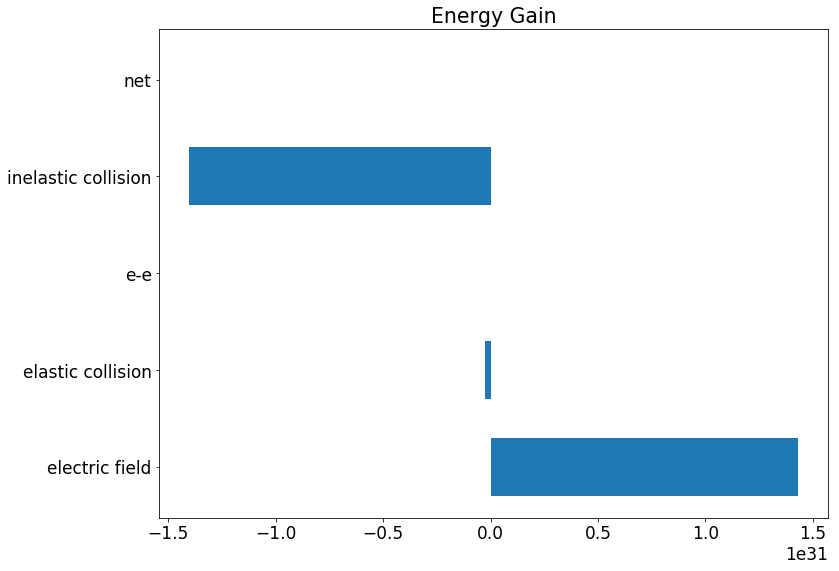

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(range(5),
        width=[energy_gain_ef, energy_lose_el, energy_gain_ee, energy_gain_e_inelas, energy_gain_net],
       height=0.6)
ax.set_yticks(range(5))
ax.set_yticklabels(['electric field', 'elastic collision', 'e-e', 'inelastic collision', 'net'])
ax.set_title("Energy Gain")

In [35]:
result_df = eedf.inelas_rctn_info
result_df.sort_values(by=['rate const'], ascending=False).head()

,formula,type,threshold_eV,rate const,energy lose
77,E + H2(v14) => E + H2(v13),DEEXCITATION,-1.2e-01,2.1e-13,-2.6e-14
38,E + H2(v13) => E + H2(v14),EXCITATION,1.2e-01,1.9e-13,2.4e-14
74,E + H2(v13) => E + H2(v12),DEEXCITATION,-1.5e-01,1.7e-13,-2.6e-14
36,E + H2(v12) => E + H2(v13),EXCITATION,1.5e-01,1.5e-13,2.4e-14
71,E + H2(v12) => E + H2(v11),DEEXCITATION,-1.8e-01,1.3e-13,-2.5e-14


In [36]:
result_df[result_df['type']=='EXCITATION'].sort_values(by=['rate const'], ascending=False)

,formula,type,threshold_eV,rate const,energy lose
38,E + H2(v13) => E + H2(v14),EXCITATION,1.2e-01,1.9e-13,2.4e-14
36,E + H2(v12) => E + H2(v13),EXCITATION,1.5e-01,1.5e-13,2.4e-14
33,E + H2(v11) => E + H2(v12),EXCITATION,1.8e-01,1.2e-13,2.2e-14
30,E + H2(v10) => E + H2(v11),EXCITATION,2.1e-01,9.4e-14,2.0e-14
27,E + H2(v9) => E + H2(v10),EXCITATION,2.4e-01,7.2e-14,1.8e-14
24,E + H2(v8) => E + H2(v9),EXCITATION,2.7e-01,5.3e-14,1.5e-14
21,E + H2(v7) => E + H2(v8),EXCITATION,3.0e-01,3.9e-14,1.2e-14
18,E + H2(v6) => E + H2(v7),EXCITATION,3.4e-01,2.8e-14,9.4e-15
15,E + H2(v5) => E + H2(v6),EXCITATION,3.7e-01,2.0e-14,7.2e-15
448,E + CO(v8) => E + CO(v9),EXCITATION,2.4e-01,1.4e-14,3.3e-15


In [37]:
result_df[result_df['formula'].str.endswith('E + H + H')].sort_values(by=['rate const'], ascending=False)

,formula,type,threshold_eV,rate const,energy lose
91,E + H2(v13) => E + H + H,EXCITATION,2.2e-01,3.0e-15,6.7e-16
90,E + H2(v12) => E + H + H,EXCITATION,3.8e-01,2.8e-15,1.1e-15
89,E + H2(v11) => E + H + H,EXCITATION,5.6e-01,2.6e-15,1.4e-15
88,E + H2(v10) => E + H + H,EXCITATION,7.8e-01,2.3e-15,1.8e-15
87,E + H2(v9) => E + H + H,EXCITATION,1.0e+00,2.1e-15,2.1e-15
86,E + H2(v8) => E + H + H,EXCITATION,1.3e+00,1.8e-15,2.4e-15
85,E + H2(v7) => E + H + H,EXCITATION,1.6e+00,1.5e-15,2.5e-15
84,E + H2(v6) => E + H + H,EXCITATION,1.9e+00,1.3e-15,2.5e-15
83,E + H2(v5) => E + H + H,EXCITATION,2.3e+00,1.0e-15,2.4e-15
82,E + H2(v4) => E + H + H,EXCITATION,2.7e+00,8.3e-16,2.2e-15


In [38]:
result_df[result_df['formula'].str.endswith('E + CO + O')].sort_values(by=['rate const'], ascending=False)

,formula,type,threshold_eV,rate const,energy lose
423,E + CO2(v21) => E + CO + O,EXCITATION,1.5e+00,2.1e-15,3.1e-15
422,E + CO2(v20) => E + CO + O,EXCITATION,1.8e+00,2.0e-15,3.4e-15
421,E + CO2(v19) => E + CO + O,EXCITATION,2.0e+00,1.8e-15,3.6e-15
420,E + CO2(v18) => E + CO + O,EXCITATION,2.2e+00,1.7e-15,3.8e-15
419,E + CO2(v17) => E + CO + O,EXCITATION,2.5e+00,1.6e-15,3.9e-15
418,E + CO2(v16) => E + CO + O,EXCITATION,2.7e+00,1.5e-15,4.0e-15
417,E + CO2(v15) => E + CO + O,EXCITATION,3.0e+00,1.4e-15,4.0e-15
416,E + CO2(v14) => E + CO + O,EXCITATION,3.2e+00,1.2e-15,4.0e-15
415,E + CO2(v13) => E + CO + O,EXCITATION,3.5e+00,1.2e-15,4.0e-15
414,E + CO2(v12) => E + CO + O,EXCITATION,3.7e+00,1.1e-15,4.0e-15
